# **Linear Regression**

`Importing the library`

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("Datasets/Advertising.csv")

In [3]:
data.head()



,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
type(data.head())

pandas.core.frame.DataFrame

In [5]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


c:\Users\Samee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


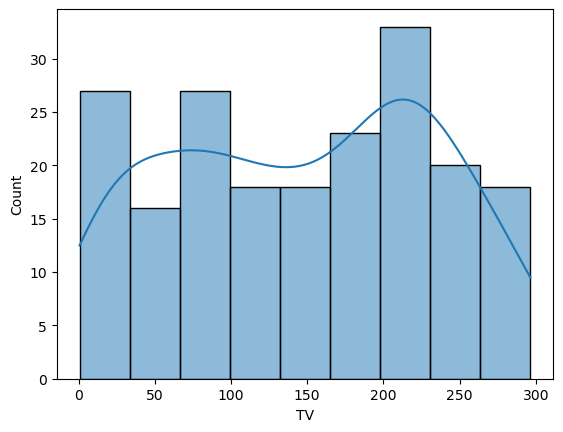

In [6]:
sns.histplot(x=data["TV"],kde=True)
plt.show()

`Data Processing and feature engineering`

In [7]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

c:\Users\Samee\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Samee\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Samee\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Samee\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

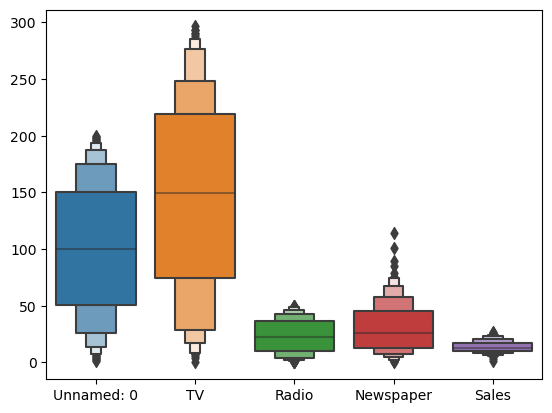

In [8]:
sns.boxenplot(data=data)
plt.show()

`Feature Selection`

In [9]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [10]:
l1=['Unnamed: 0']
data.drop(l1,axis=1,inplace=True)

In [11]:
data # droped teh index column

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<Axes: >

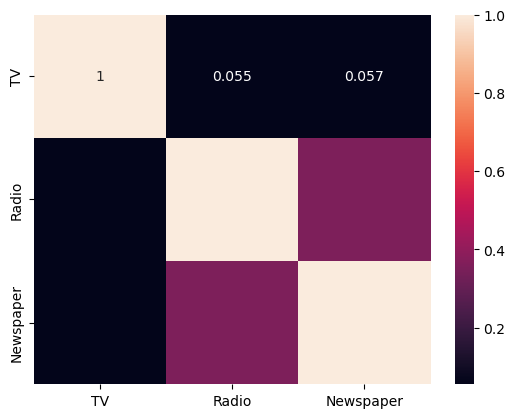

In [12]:
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True)

`Model Creation`

In [13]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
X=data[['TV','Radio','Newspaper']]
y=data.Sales

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [33]:
x_train

,TV,Radio,Newspaper
26,142.9,29.3,12.6
134,36.9,38.6,65.6
180,156.6,2.6,8.3
158,11.7,36.9,45.2
189,18.7,12.1,23.4
...,...,...,...
104,238.2,34.3,5.3
129,59.6,12.0,43.1
183,287.6,43.0,71.8
174,222.4,3.4,13.1


In [29]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train) #training of linear Regression
y_predict=LR.predict(x_test)

In [30]:
y_predict

array([17.2752476 , 16.74844593, 21.97674588, 24.59448907, 12.11768831,
       21.02033688, 10.15643252, 12.34380805, 11.70461016, 17.02091374,
       22.77376935, 15.3468411 ,  8.47830473, 14.9155752 , 18.61592987,
       18.78535771, 18.92262443, 14.411111  ,  9.65948532, 20.60497137,
       14.91294261, 17.84682569, 23.05099966,  7.74477655, 21.55734502,
       19.45793001, 13.93893979, 11.55855542, 18.37843109, 12.19352005,
       11.35032808,  9.91369153, 13.57335272, 15.18177818, 18.06379607,
        6.80705318, 14.14598886, 14.14649594, 14.1536933 , 10.69806825])

In [31]:
x_test.size

120

In [32]:
y_predict.size

40

In [25]:
y_test

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
111    21.8
90     11.2
177    11.7
88     12.9
187    17.3
61     24.2
199    13.4
191     9.9
123    15.2
184    17.6
188    15.9
33     17.4
171    14.5
138     9.6
84     21.7
81     12.3
102    14.8
147    25.4
34      9.5
47     23.2
124    19.7
112    14.1
6      11.8
14     19.0
190    10.8
80     11.8
18     11.3
167    12.2
45     14.9
153    19.0
119     6.6
100    11.7
83     13.6
181    12.2
71     12.4
Name: Sales, dtype: float64

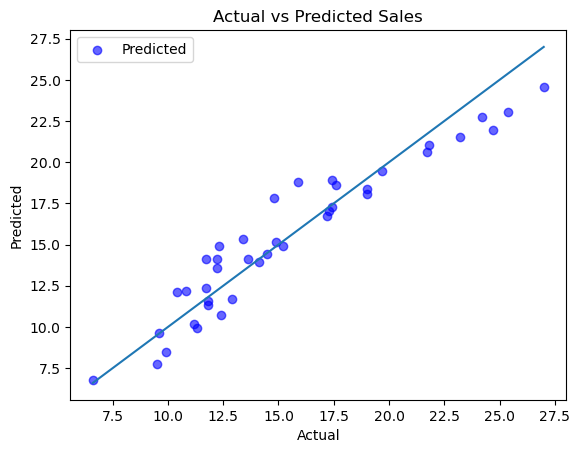

In [42]:
plt.scatter(y_test, y_predict, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [35]:
print(y_test.size,y_predict.size)

40 40


In [21]:
# Testing the dataset 
mse=mean_squared_error(y_test,y_predict)
print("MSE :",mse)

rmse=np.sqrt(mse)
print("RMSE :",rmse)

mae=mean_absolute_error(y_test,y_predict)
print("MAE :", mae)

r2= r2_score(y_test,y_predict)
print("R Squared :",r2)

MSE : 2.217151072541898
RMSE : 1.4890100982001089
MAE : 1.2114892606469108
R Squared : 0.9085774752313166


In [22]:
# Testing the dataset 
# Base on the training dataset
y_pred_tain=LR.predict(x_train)

mse=mean_squared_error(y_train,y_pred_tain)
print("MSE :",mse)

rmse=np.sqrt(mse)
print("RMSE :",rmse)

mae=mean_absolute_error(y_train,y_pred_tain)
print("MAE :",mae)

r2=r2_score(y_train,y_pred_tain)
print("R Squred :",r2)


MSE : 2.9573084776421625
RMSE : 1.7196826677158092
MAE : 1.284270010108426
R Squred : 0.8911672911176578
